***
# <font color=orange size=10>Capítulo 2 - Distribuciones de datos y muestreo</font>
***


## <font color=green size=10>2.1 Población y muestra</font>
***

La siguiente imagen intenta ilustrar la diferencia entre población y muestra:

![Fig 2.1](Datos/Poblacion_Muestra.png)

## <font color=green size=10>2.2 Muestreo Aleatorio y Sesgo (Bias) en la Muestra</font>
***

Una muestra es un subconjunto de datos dentro  un conjunto de datos más grande la población.

El muestreo aleatorio es un proceso en el cual cada miembro disponible de la población que se está muestreando tiene la misma posibilidad de ser elegido para la muestra en cada selección. La muestra resultante se llama una **muestra aleatoria simple**. 

La calidad de los datos a menudo importa más que la cantidad de datos al hacer una estimación o un modelo basado en una muestra. La calidad de los datos en ciencia de datos implica completitud, consistencia de formato, limpieza y precisión de los puntos de datos individuales. La estadística además añade la noción de **representatividad**.

### <font color=violet size=10>2.2.1 Términos Clave para el Muestreo Aleatorio</font>
***

**Muestra (Sample)**  
Un subconjunto de un conjunto de datos más grande.

**Población**  
El conjunto de datos más grande o la idea de un conjunto de datos.

**N (n)**  
El tamaño de la población (muestra).

**Muestreo aleatorio**  
Selección de elementos en una muestra de manera aleatoria.

**Muestreo estratificado**  
División de la población en estratos y muestreo aleatorio dentro de cada estrato. Por ejemplo: estudiantes de un colegio. Se escogen muestras de cada grado/año. 20 Estudiantes de 1er año, 20 estudiantes del 2do año...

**Estrato (pl., estratos)**  
Un subgrupo homogéneo de una población con características comunes. Ejemplo: Estudiantes del primer año.

**Muestra aleatoria simple**  
La muestra que resulta del muestreo aleatorio sin estratificar la población.

**Sesgo (Bias)**  
Error sistemático.

**Sesgo en la muestra (Sample Bias)**  
Una muestra que no representa adecuadamente a la población.

### <font color=violet size=10>2.2.2 Sesgo de Muestreo por Autoselección</font>
***

Las reseñas de restaurantes, hoteles, cafés, y otros que lees en sitios de redes sociales son propensas al sesgo porque las personas que las envían no son seleccionadas aleatoriamente; más bien, son ellas mismas quienes toman la iniciativa de escribir. Esto conduce a un sesgo de autoselección: las personas motivadas para escribir reseñas pueden haber tenido malas experiencias, pueden tener alguna relación con el establecimiento, o simplemente pueden ser un tipo de persona diferente a las que no escriben reseñas.

### 2.2.3 Sesgo

El sesgo estadístico se refiere a errores de medición o de muestreo que son sistemáticos y producidos por el proceso de medición o muestreo. Es importante hacer una distinción entre errores debidos al azar y errores debidos al sesgo. Consideremos el proceso físico de un arma disparando a un blanco. No impactará en el centro absoluto del blanco cada vez, o incluso la mayoría de las veces. Un proceso no sesgado producirá error, pero este será aleatorio y no tenderá fuertemente en ninguna dirección (ver Figura 2.2). 

![fig 2.2](Datos/2.2.png)

Los resultados mostrados en la Figura 2.3 muestran un proceso sesgado: sigue habiendo error aleatorio en ambas direcciones, x e y, pero también hay un sesgo. Los disparos tienden a caer en el cuadrante superior derecho.

![Fig 2.3](Datos/2.3.png)

El sesgo se presenta en diferentes formas y puede ser observable o invisible. Cuando un resultado sugiere la presencia de sesgo (por ejemplo, al compararlo con un punto de referencia o valores reales), a menudo es un indicador de que un modelo estadístico o de aprendizaje automático ha sido mal especificado, o que se ha omitido una variable importante.


> **Ejercicio 2.1**: *Investigar los tipos de sesgos (Bias) en estadística y aprendizaje automático.* Añade un resumen en este mismo notebook.

Existen varios tipos de sesgos pero se explican los sesgos comunes como: el sesgo de selección, sesgo de información y sesgo de confirmación, entre otros, y veremos cómo pueden afectar los modelos de aprendizaje automático.

1. Sesgo de Selección (Selection Bias)

El sesgo de selección ocurre cuando los datos utilizados para entrenar un modelo de aprendizaje automático no son representativos de la población general que el modelo intenta predecir. Esto puede deberse a una muestra no aleatoria o a la exclusión de ciertos grupos durante la recopilación de datos.

Ejemplo:
Supongamos que estamos creando un modelo para predecir enfermedades cardíacas, pero solo recolectamos datos de hospitales urbanos, ignorando las áreas rurales.

In [1]:
import pandas as pd
import numpy as np

# Generamos datos simulados
np.random.seed(42)
data_urbana = np.random.normal(loc=60, scale=10, size=100)  # Más casos en zonas urbanas
data_rural = np.random.normal(loc=50, scale=10, size=40)    # Menos casos en zonas rurales

# Unimos los datos
data = np.concatenate([data_urbana, data_rural])
labels = ['urbano'] * 100 + ['rural'] * 40

# Creamos el DataFrame
df = pd.DataFrame({'Edad': data, 'Zona': labels})
display(df)

# Visualizamos el problema del sesgo de selección
display(df.groupby('Zona').mean())


,Edad,Zona
0,64.967142,urbano
1,58.617357,urbano
2,66.476885,urbano
3,75.230299,urbano
4,57.658466,urbano
...,...,...
135,65.499344,rural
136,42.167467,rural
137,46.779385,rural
138,58.135172,rural


,Edad
Zona,
rural,49.655161
urbano,58.961535


2. Sesgo de Información (Information Bias)

Este tipo de sesgo ocurre cuando hay errores en la medición de las variables o en la información recopilada, lo que lleva a conclusiones erróneas.

Ejemplo:
Imagina que un sensor que mide la temperatura está defectuoso y siempre registra temperaturas 5 grados más altas.

In [2]:
# Simulación de lecturas de temperatura
temperaturas_reales = np.random.normal(loc=20, scale=5, size=100)
temperaturas_medidas = temperaturas_reales + 5  # Sensor defectuoso

# Comparación de temperaturas
df_temp = pd.DataFrame({'Real': temperaturas_reales, 'Medida': temperaturas_medidas})
print(df_temp.head())


        Real     Medida
0  21.137300  26.137300
1  26.535714  31.535714
2  11.962584  16.962584
3  20.923169  25.923169
4  21.299414  26.299414


3. Sesgo de Confirmación (Confirmation Bias)

El sesgo de confirmación es la tendencia a favorecer, buscar, interpretar y recordar información de una manera que confirma las creencias o hipótesis preexistentes, mientras se da menos consideración a posibles alternativas.

Ejemplo:
Supongamos que solo recolectamos datos adicionales cuando estos apoyan nuestra hipótesis inicial.

In [3]:
# Generamos datos iniciales
datos = np.random.normal(loc=0, scale=1, size=50)

# Suponemos que nuestra hipótesis es que la media es positiva
media_observada = np.mean(datos)
print("Media observada:", media_observada)

# Recolectamos más datos solo si la media observada es positiva
if media_observada > 0:
    datos_adicionales = np.random.normal(loc=0.5, scale=1, size=20)
    datos = np.concatenate([datos, datos_adicionales])

# Nueva media observada
nueva_media = np.mean(datos)
print("Nueva media con sesgo de confirmación:", nueva_media)


Media observada: -0.05921206077930762
Nueva media con sesgo de confirmación: -0.05921206077930762


Resultados observados:

Si la media inicial es positiva, se añaden los datos adicionales, lo que podría incrementar aún más la media debido a la media positiva de los nuevos datos.

Si la media inicial no es positiva (como en tu caso donde es aproximadamente -0.059), no se añaden datos adicionales, por lo que la media final es igual a la media inicial.

> **Ejercicio 2.2**: *Investigar la influencia del sesgo en Machine Learning incluye un caso breve en este mismo notebook.*

Caso de Sesgo en el Reconocimiento Facial

Descripción del caso:
Uno de los ejemplos más citados de sesgo en el aprendizaje automático es el sesgo racial en los algoritmos de reconocimiento facial. Investigaciones y pruebas han demostrado que los sistemas de reconocimiento facial tienden a tener tasas más altas de errores cuando identifican rostros de personas de color en comparación con rostros de personas blancas. Este problema se debe en gran parte a la falta de diversidad en los conjuntos de datos utilizados para entrenar estos sistemas.


Los algoritmos de reconocimiento facial son entrenados con conjuntos de datos compuestos por imágenes de rostros. Si la mayoría de las imágenes en un conjunto de datos son de personas de un grupo étnico particular, el algoritmo aprende a reconocer mejor esos rostros y puede no desempeñarse igual de bien con rostros de otros grupos étnicos.

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Simular datos
np.random.seed(42)
group1 = np.random.normal(loc=0, scale=1, size=(100, 10))  # Grupo mayoritario
group2 = np.random.normal(loc=0.5, scale=1, size=(20, 10))  # Grupo minoritario

# Etiquetas de grupo
labels1 = [0]*100
labels2 = [1]*20

# Unir datos
data = np.vstack((group1, group2))
labels = np.array(labels1 + labels2)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Entrenar un clasificador
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predecir y evaluar
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.83


En este código, group1 tiene una representación mucho mayor que group2, lo que podría influir en cómo el modelo aprende a clasificar los dos grupos, posiblemente favoreciendo al grupo mayoritario. Este es un ejemplo simple que refleja cómo la representación desigual en los datos de entrenamiento puede llevar a un sesgo en el modelo.

### <font color=violet size=10>2.2.4 Selección Aleatoria</font>
***

Cuando se trata de muestreo, imagínate que quieres entender lo que piensa un grupo de gente—como en una elección. Si solo preguntas a tus amigos, obtendrás una idea sesgada porque todos son como tú. Eso es lo que pasó en un caso famoso donde predijeron mal el resultado de una elección. Para solucionarlo, ahora usamos técnicas que nos aseguran obtener una "foto" más precisa de toda la población, seleccionando personas al azar.

Es como si quisieras saber qué sabor de helado prefieren en tu ciudad y, en lugar de solo preguntar en tu barrio, vas y haces una encuesta en diferentes partes de la ciudad, al azar. Esto puede ser desde elegir clientes al azar en una base de datos hasta tomar en cuenta variables como la hora del día para capturar diferentes tipos de personas.


#### <font color=violet size=10>Tamaño versus Calidad: ¿Cuándo Importa el Tamaño?</font>
***

En la era de la abundancia de datos, a veces pensamos que entre más, mejor. Pero no siempre es así. Trabajar con muestras más pequeñas nos permite profundizar más y entender mejor los datos. Si tienes millones de registros, podría ser un lío buscar errores o datos faltantes, pero si trabajas con unos miles, puedes manejar mejor esta búsqueda y realmente entender lo que está pasando.



#### <font color=violet size=10>Ejemplo de Importancia de la Calidad versus el Tamaño de los Datos</font>
***

Ejemplo Práctico: Imagina una tienda en línea analizando la satisfacción del cliente. Pueden tener millones de transacciones, pero solo un pequeño grupo de clientes deja reseñas. Si solo analizan las reseñas detalladas, aunque sean menos, obtendrán insights mucho más valiosos sobre qué hace feliz o infeliz a un cliente, en lugar de perderse en un mar de datos menos detallados.


#### <font color=violet size=10>2.2.6 Media Muestral versus Media Poblacional</font>
***

En estadística, usamos x̄ (pronunciado "x-barra") para hablar de la media de una muestra pequeña y 'μ' (mu) para la media de toda la población. Es como si sacaras el promedio de notas de una clase (muestra) y lo compararas con el promedio de toda la escuela (población). Observamos la muestra y, a partir de ahí, inferimos cosas sobre la población completa.

#### <font color=violet size=10>2.2.7 Regresión a la Media</font>
***

Este concepto se refiere a que cuando algo es extremadamente alto o bajo, lo siguiente que mides probablemente estará más cerca del promedio. Es como el "novato del año" en deportes, que tiene una temporada increíble y luego parece menos espectacular al año siguiente. Muchas veces, el primer año tuvo suerte además de habilidad, y el siguiente año, la suerte quizás no acompaña tanto, por lo que sus resultados vuelven al promedio.

![Fig. 2.4](Datos/2.4.png)

 
Este fenómeno estadístico se conoce como regresión a la media y se produce cuando se realizan mediciones repetidas.Significa que, en general, las observaciones relativamente altas (o bajas) suelen ir seguidas de otras menos extremas más cercanas a la media real del sujeto.La regresión a la media sigue siendo un fenómeno estadístico importante que a menudo no se tiene en cuenta y que puede dar lugar a conclusiones engañosas.Por ejemplo, las estadísticas oficiales publicadas sobre el impacto de los radares de velocidad sugerían que salvaban una media de 100 vidas al año.Este resultado se basaba en el descenso de accidentes mortales que se había producido desde la instalación de los radares.Sin embargo, los radares de velocidad suelen instalarse después de que se haya producido un número inusualmente alto de accidentes, por lo que, en general, cabría esperar que estos volvieran después a niveles normales. Otro análisis que tuvo en cuenta la regresión a la media descubrió que el 50% del descenso de los accidentes se habría producido tanto si se hubiera instalado un radar de velocidad como si no.Esto pone de relieve que, aunque los radares de velocidad pueden reducir el número de accidentes mortales en carretera, la estimación de la magnitud de su efecto debe hacerse con cuidado.  


### Ejemplo en aprendizaje automático

Supongamos que se entrena un modelo de clasificación para predecir si un cliente comprará o no un producto basado en ciertos datos de comportamiento. Durante el proceso de evaluación, se realiza una prueba en un conjunto de datos de validación, y el modelo obtiene una precisión extremadamente alta, mucho mayor que la obtenida en otras pruebas anteriores.

Es tentador pensar que el modelo es excepcionalmente bueno, pero esta alta precisión podría ser un resultado fortuito debido a la particularidad de ese conjunto de validación (quizás el conjunto de datos era más fácil de predecir por casualidad). Al probar el modelo en otros conjuntos de datos adicionales o en datos nuevos, es probable que la precisión vuelva a un nivel más cercano al promedio obtenido anteriormente. Este es un caso de regresión a la media en aprendizaje automático: después de un rendimiento extremo, los resultados posteriores tienden a ser más cercanos a la media de los resultados anteriores.

> **Ejercicio 2.3** Supongamos que tienes los resultados de dos exámenes de matemáticas de un grupo de 100 estudiantes. El primer examen se realizó al inicio del semestre y el segundo examen al final del semestre. Queremos analizar si existe una regresión a la media entre los resultados de estos dos exámenes.

> Observa los resultados en el gráfico (ejecute el código). Compara los estudiantes que obtuvieron puntuaciones extremadamente altas o bajas en el primer examen con sus puntuaciones en el segundo examen. ¿Notas alguna tendencia hacia el promedio en sus puntuaciones?

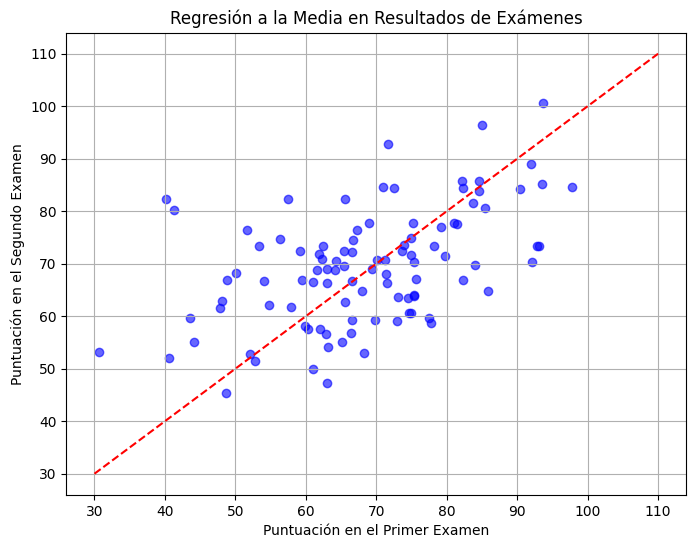

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Simulación de resultados de exámenes
np.random.seed(42)
exam1_scores = np.random.normal(70, 15, 100)  # Puntuaciones del primer examen
exam2_scores = exam1_scores * 0.5 + np.random.normal(35, 10, 100)  # Puntuaciones del segundo examen con regresión a la media

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(exam1_scores, exam2_scores, color='blue', alpha=0.6)
plt.plot([30, 110], [30, 110], color='red', linestyle='--')  # Línea de referencia (sin regresión)
plt.title('Regresión a la Media en Resultados de Exámenes')
plt.xlabel('Puntuación en el Primer Examen')
plt.ylabel('Puntuación en el Segundo Examen')
plt.grid(True)
plt.show()

> a. ¿Qué observas en el gráfico en términos de regresión a la media?

> b. ¿Por qué crees que los estudiantes que obtuvieron puntuaciones extremadamente altas o bajas en el primer examen tienden a acercarse más al promedio en el segundo examen?

> c. ¿Cómo podría este concepto aplicarse en otras áreas, como en el análisis de rendimiento en deportes o en la predicción de ventas?

A) En el gráfico proporcionado, la regresión a la media es evidente, especialmente al observar cómo los puntos se alejan de la línea roja punteada (que indica igualdad de puntuaciones entre los dos exámenes) a medida que nos movemos hacia los extremos en el eje X (puntuaciones del primer examen). Los estudiantes con puntuaciones muy altas o muy bajas en el primer examen tienden a tener puntuaciones más cercanas al promedio del grupo en el segundo examen. Esto se manifiesta en que los puntos tienden a agruparse más cerca de la línea horizontal que representa el promedio general de los dos exámenes, en lugar de alinearse con la línea roja punteada.

b. Explicación de la Tendencia hacia el Promedio
La tendencia de los estudiantes que obtuvieron puntuaciones extremadamente altas o bajas en el primer examen a acercarse más al promedio en el segundo examen se puede atribuir a varios factores:

Variabilidad Aleatoria: Las puntuaciones extremas pueden ser influenciadas por factores aleatorios como el estado de ánimo del estudiante, la familiaridad con los temas específicos del examen, o incluso errores en la evaluación. Estos factores pueden no repetirse de la misma manera, llevando las puntuaciones hacia un resultado más 'normal' o promedio en sucesivas evaluaciones.

Errores de Medición: En cualquier tipo de prueba o medición, siempre hay un grado de error de medición. Los estudiantes que extremadamente bien o mal podrían haber tenido suerte o mala suerte respectivamente, y es probable que estos extremos no se repitan debido a la naturaleza aleatoria de dichos errores.

Adaptación y Aprendizaje: Los estudiantes en los extremos pueden cambiar su comportamiento de estudio entre los exámenes. Los que lo hicieron excepcionalmente bien pueden sentirse complacientes, mientras que los que lo hicieron mal pueden esforzarse más, resultando en una puntuación que regresa hacia el promedio del grupo.

c. Aplicación de la Regresión a la Media en Otros Ámbitos
Deportes:

En el deporte, especialmente en ligas profesionales, frecuentemente se ve la regresión a la media con "novatos del año" que tienen temporadas destacadas seguidas por temporadas menos espectaculares. Esto se puede analizar y prever para tomar decisiones sobre contratos, entrenamientos, y estrategias de juego. Por ejemplo, un equipo podría evitar sobrevalorar a un jugador basándose en una sola temporada excepcional.
Negocios y Ventas:

En el ámbito empresarial, particularmente en ventas, la regresión a la media puede ayudar a moderar las expectativas después de un periodo particularmente bueno o malo. Si un producto tiene un pico de ventas debido a una campaña publicitaria, es probable que las ventas "regresen" a un nivel más normal después de que el efecto de la campaña se disipe.
Además, se puede usar para ajustar las estrategias de producción y marketing, entendiendo que los extremos en las ventas pueden no ser sostenibles a largo plazo.
Finanzas:

En las inversiones, el rendimiento extremo de una acción o fondo en un año dado a menudo regresa al promedio en años siguientes. Esto es crucial para la gestión de portafolios, evitando decisiones basadas en rendimientos anormalmente altos o bajos que pueden no ser repetibles.


### Ideas Clave
- Especificar una hipótesis y luego recopilar datos siguiendo los principios de aleatorización y muestreo aleatorio asegura contra el sesgo.
- La regresión a la media, que significa "volver atrás", es distinta del método de modelado estadístico de regresión lineal, en el cual se estima una relación lineal entre variables predictoras y una variable de resultado.


## <font color=green size=10>2.3 Distribución Muestral de una Estadística</font>
***

El término "distribución muestral de una estadística" se refiere a la distribución de una estadística muestral sobre muchas muestras tomadas de la misma población. Gran parte de la estadística clásica se ocupa de hacer inferencias de (pequeñas) muestras a (muy grandes) poblaciones.

### Términos Clave para la Distribución Muestral

**Estadística muestral**  
Una métrica calculada para una muestra de datos extraída de una población más grande.

**Distribución de datos**  
La distribución de frecuencias de valores individuales en un conjunto de datos.

**Distribución muestral**  
La distribución de frecuencias de una estadística muestral sobre muchas muestras o resamples.

**Teorema del límite central**  
La tendencia de la distribución muestral a adoptar una forma normal a medida que aumenta el tamaño de la muestra.

**Error estándar**  
La variabilidad (desviación estándar) de una estadística muestral en muchas muestras (no debe confundirse con la desviación estándar, que por sí sola se refiere a la variabilidad de valores individuales de datos).

### Explicaciones Adicionales

Típicamente, se toma una muestra con el objetivo de medir algo (con una estadística muestral) o modelar algo (con un modelo estadístico o de aprendizaje automático). Dado que nuestra estimación o modelo se basa en una muestra, podría tener errores; podría ser diferente si tomáramos una muestra diferente. Por lo tanto, nos interesa saber qué tan diferente podría ser: una preocupación clave es la variabilidad muestral. Si tuviéramos muchos datos, podríamos tomar muestras adicionales y observar directamente la distribución de una estadística muestral.

Es importante distinguir entre la distribución de los puntos de datos individuales, conocida como la distribución de datos, y la distribución de una estadística muestral, conocida como la distribución muestral.

Esto se ilustra en un ejemplo usando el ingreso anual de los solicitantes de préstamos de LendingClub.  
La tabla 2.1 muestra algunos registros de datos de préstamos personales de LendingClub. LendingClub es un líder en préstamos entre personas (peer-to-peer lending), donde grupos de inversionistas otorgan préstamos personales a individuos.


**Table 2.1. Algunos registros y columnas de datos de préstamos de LendingClub**

| **Outcome** | **Loan amount** | **Income** | **Purpose**            | **Years employed** | **Home ownership** | **State** |
|-------------|-----------------|------------|------------------------|--------------------|-------------------|-----------|
| Paid off    | 10000           | 79100      | debt_consolidation     | 11                 | MORTGAGE          | NV        |
| Paid off    | 9600            | 48000      | moving                 | 5                  | MORTGAGE          | TN        |
| Paid off    | 18800           | 120036     | debt_consolidation     | 11                 | MORTGAGE          | MD        |
| Default     | 15250           | 232000     | small_business         | 9                  | MORTGAGE          | CA        |
| Paid off    | 17050           | 35000      | debt_consolidation     | 4                  | RENT              | MD        |
| Paid off    | 5500            | 43000      | debt_consolidation     | 4                  | RENT              | KS        |



A continuación se presenta una explicación de lo que representa cada columna en la tabla de datos de LendingClub:

- **Outcome**: Indica el resultado del préstamo. Puede tener dos valores principales:
  - **Paid off**: Significa que el préstamo fue pagado en su totalidad por el prestatario.
  - **Default**: Significa que el prestatario incumplió y no pudo pagar el préstamo según lo acordado.

- **Loan amount**: Representa la cantidad de dinero (en dólares) que fue prestada al individuo.

- **Income**: Indica el ingreso anual del prestatario en dólares. Este dato se utiliza para evaluar la capacidad del prestatario para devolver el préstamo.

- **Purpose**: Describe el propósito o razón por la cual el prestatario solicitó el préstamo. Ejemplos comunes incluyen:
  - **debt_consolidation**: El prestatario solicitó el préstamo para consolidar deudas existentes.
  - **moving**: El préstamo fue solicitado para cubrir gastos de mudanza.
  - **small_business**: El prestatario solicitó el préstamo para financiar un pequeño negocio.

- **Years employed**: Indica la cantidad de años que el prestatario ha estado empleado. Este dato es relevante para evaluar la estabilidad laboral del prestatario.

- **Home ownership**: Describe el estado de propiedad de la vivienda del prestatario. Los valores comunes incluyen:
  - **MORTGAGE**: El prestatario tiene una hipoteca sobre su vivienda.
  - **RENT**: El prestatario vive en una vivienda alquilada.

- **State**: Indica el estado de los Estados Unidos en el que reside el prestatario, usando abreviaturas de dos letras (por ejemplo, **NV** para Nevada, **CA** para California).

Estas columnas proporcionan información clave que se puede utilizar para evaluar la solvencia del prestatario y el riesgo asociado al préstamo.


Una vez claro el significado de la tabla, vamos a tomar tres muestras de estos datos:  
- una muestra de 1,000 valores: simplemente se seleccionarán 1,000 registros individuales de la tabla de datos de préstamos.
  
- una muestra de 1,000 medias de 5 valores: en lugar de tomar 1,000 registros individuales, se tomarán grupos de 5 registros y se calculará la media (promedio) de un valor específico en cada grupo (por ejemplo, la media del ingreso). Este proceso se repetirá hasta tener 1,000 medias, cada una calculada a partir de un grupo de 5 valores. Este enfoque nos permite observar cómo se comporta la media de pequeños grupos de datos en lugar de observar solo los valores individuales.
  
- una muestra de 1,000 medias de 20 valores: similar al anterior, pero en lugar de tomar grupos de 5 registros, se tomarán grupos de 20 registros. Nuevamente, se calculará la media para cada grupo y se repetirán los cálculos hasta obtener 1,000 medias, cada una basada en 20 valores. Este tipo de muestra nos da una idea de cómo la media de un tamaño de muestra más grande se comporta en comparación con la media de muestras más pequeñas (en este caso, de 5 valores).
  
Luego, se hace el histograma de cada muestra para producir la gráfica correspondiente.

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

loans_income = pd.read_csv('Datos/loans_income.csv').squeeze('columns')

sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
display(results.head())

,income,type
1346,45198.0,Data
37210,83000.0,Data
7819,70000.0,Data
32220,66000.0,Data
10349,90000.0,Data


In [11]:
display(results.tail())

,income,type
995,69335.05,Mean of 20
996,67024.35,Mean of 20
997,67300.00,Mean of 20
998,63507.45,Mean of 20
999,65356.65,Mean of 20


> **Ejercicio 2.4**: *Explique el código de arriba. Con otro dataset de su preferencia repita el ejercicio de arriba.*   

In [21]:
# Guardar 'results' en un archivo CSV llamado 'results.csv'
# results.to_csv('results.csv', index=False)

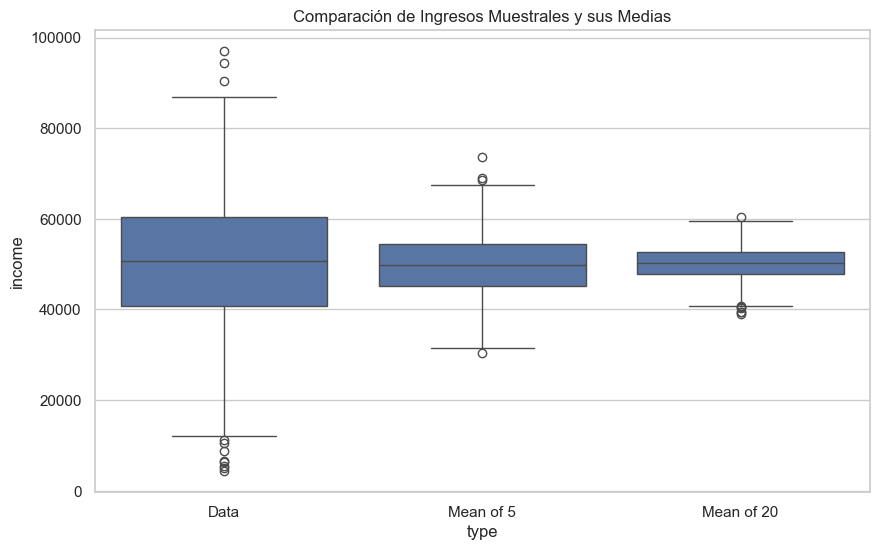

In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pylab as plt

# Simulando un nuevo dataset de ingresos
np.random.seed(42)  # Para reproducibilidad
new_loans_income = pd.Series(np.random.normal(50000, 15000, 50000))

# Creando muestras para el nuevo dataset
new_sample_data = pd.DataFrame({
    'income': new_loans_income.sample(1000),
    'type': 'Data',
})

new_sample_mean_05 = pd.DataFrame({
    'income': [new_loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

new_sample_mean_20 = pd.DataFrame({
    'income': [new_loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

# Concatenar y visualizar resultados
new_results = pd.concat([new_sample_data, new_sample_mean_05, new_sample_mean_20])

# Visualizando los resultados con seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='income', data=new_results)
plt.title('Comparación de Ingresos Muestrales y sus Medias')
plt.show()


Ahora vamos a obtener los histogramas:

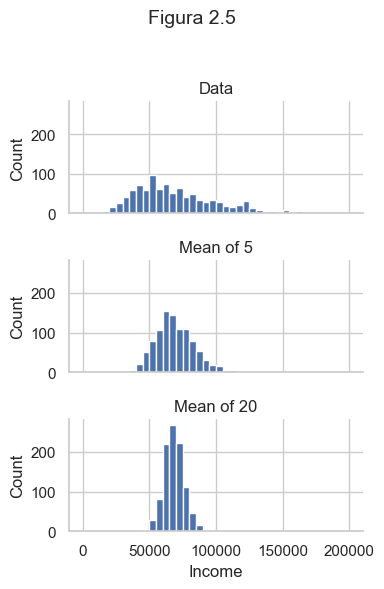

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')


g.fig.suptitle('Figura 2.5', fontsize=14)


plt.tight_layout(rect=[0, 0, 1, 0.95])


plt.show()

> **Ejercicio 2.5**: *Explique el codigo dado arriba. Con el mismo dataset usado en el ejercicio 2.4 haga los plots*

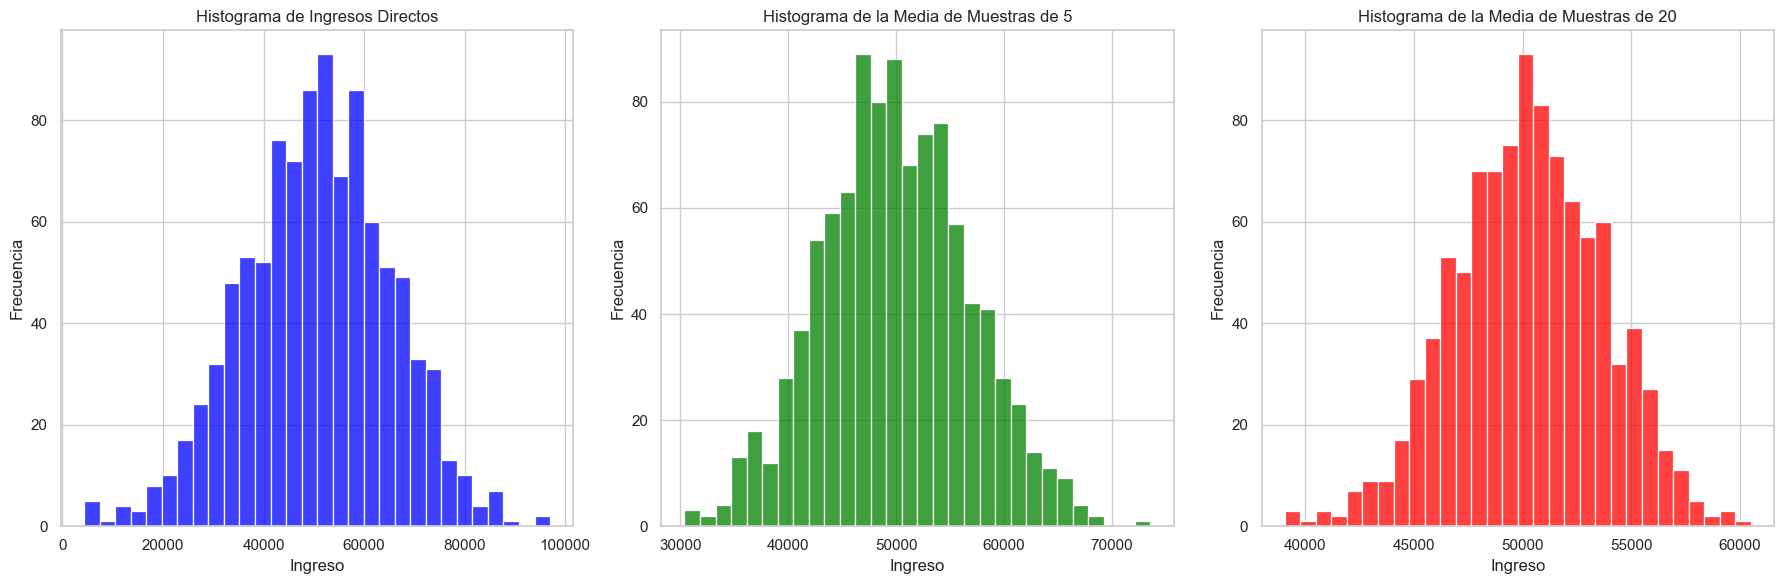

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustes de estilo para los gráficos
sns.set(style="whitegrid")

# Creación de figuras para los histogramas
plt.figure(figsize=(18, 6))

# Histograma para los datos directos
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, primer gráfico
sns.histplot(new_sample_data['income'], bins=30, kde=False, color='blue')
plt.title('Histograma de Ingresos Directos')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')

# Histograma para la media de muestras de tamaño 5
plt.subplot(1, 3, 2)
sns.histplot(new_sample_mean_05['income'], bins=30, kde=False, color='green')
plt.title('Histograma de la Media de Muestras de 5')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')

# Histograma para la media de muestras de tamaño 20
plt.subplot(1, 3, 3)
sns.histplot(new_sample_mean_20['income'], bins=30, kde=False, color='red')
plt.title('Histograma de la Media de Muestras de 20')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')

# Mostrar los histogramas
plt.tight_layout()
plt.show()


El histograma de los valores de datos individuales está ampliamente distribuido y sesgado hacia valores más altos, como es de esperar con los datos de ingresos. Los histogramas de las medias de 5 y 20 valores son cada vez más compactos y tienen una forma más similar a una campana.


## <font color=green size=10>2.4 Teorema del límite central </font>
***

Imagina que estás tomando fotos con una cámara antigua que no siempre es precisa. A veces tus fotos salen demasiado oscuras o demasiado claras, pero si tomas muchas fotos del mismo lugar, la mayoría terminará viéndose "normal". Eso es un poco lo que dice el Teorema del Límite Central sobre los datos: no importa qué tan extraña sea la "foto" (distribución) de tu conjunto de datos original, si tomas suficientes muestras y calculas su media, el resultado parecerá más y más a lo que esperaríamos de una distribución normal (la clásica curva en forma de campana).

#### <font color=violet size=10>Error Estándar</font>
***

Piensa en el error estándar como una manera de medir qué tan confiables son tus medias de muestras. Es como intentar calcular cuán cerca está el dardo del centro del blanco cada vez que lanzas. Mientras más dardos lanzas, más precisos puedes ser sobre cuán buen tirador eres. En estadística, mientras más grande es tu muestra, más pequeño es el error estándar, y más confianza puedes tener en que tu media de muestra está cerca de la media real de toda la población.

# $\text{Error estándar} = SE = \frac{s}{\sqrt{n}}$

A medida que aumenta el tamaño de la muestra, el error estándar disminuye, lo que corresponde a lo observado en la Figura 2.5. 

Considera el siguiente enfoque para medir el error estándar:

1. Recoge una serie de nuevas muestras de la población.
2. Para cada nueva muestra, calcula la estadística (por ejemplo, la media).
3. Calcula la desviación estándar de las estadísticas calculadas en el paso 2; utiliza esto como tu estimación del error estándar.

En la práctica, este enfoque de recolectar nuevas muestras para estimar el error estándar no suele ser muy eficiente. En su lugar, puedes utilizar remuestreo **bootstrap**. En la estadística moderna, el bootstrap se ha convertido en la forma mas usada de estimar el error estándar. Puede utilizarse para prácticamente cualquier estadística y no depende del teorema del límite central u otros supuestos de distribución.


#### <font color=violet size=10>Desviación Estándar versus Error Estándar</font>
***

No confundir la desviación estándar (que mide la variabilidad de puntos de datos individuales) con el error estándar (que mide la variabilidad de una métrica de la muestra).

### Ideas Clave

- La distribución de frecuencias de una estadística muestral nos dice cómo esa métrica podría variar de una muestra a otra.
- Esta distribución muestral puede estimarse a través del bootstrap o mediante fórmulas que dependen del teorema del límite central.
- Una métrica clave que resume la variabilidad de una estadística muestral es su error estándar.

## <font color=green size=10>2.6 Bootstrap</font>
***

El bootstrap es como hacer trampa en una prueba de práctica al usar las preguntas que ya sabes que estarán en el examen. En lugar de salir y recolectar nuevas muestras, que puede ser caro y consumir mucho tiempo, simplemente reutilizas los datos que ya tienes de maneras inteligentes para estimar cuánto podrían variar tus resultados. Esto te ayuda a entender qué tan estables son tus estadísticas, como la media, incluso sin asumir que tus datos se ajustan perfectamente a una distribución normal.

### Términos Clave para el Bootstrap

>**Bootstrap Sample**  
Una muestra tomada con reemplazo de un conjunto de datos observado.

>**Remuestreo (Resampling)**  
El proceso de tomar muestras repetidas de datos observados; incluye tanto procedimientos de bootstrap como de permutación (shuffling).

Conceptualmente, se puede imaginar el bootstrap como replicar la muestra original miles o millones de veces para que tengas una población hipotética que encarna todo el conocimiento de tu muestra original (simplemente es más grande). Luego puedes tomar muestras de esta población hipotética con el propósito de estimar una distribución muestral; ver la Figura 2.6.



![Fig 2.6](dATOS/2.6.png)

### ¿Cómo funciona el Bootstrap?

El proceso de bootstrap se puede resumir en los siguientes pasos:

1. **Toma de muestras con reemplazo:**

  Imagina que tienes una bolsa llena de canicas de diferentes colores, cada canica representa un dato de tu conjunto original. Cuando realizas una toma de muestras con reemplazo, sacas una canica, registras su color (el dato) y luego la devuelves a la bolsa. Esto significa que esa misma canica podría ser seleccionada de nuevo en la misma muestra. Este paso es crucial porque te asegura que cada muestra que generes pueda tener la misma diversidad (o incluso duplicados) que tienes en el conjunto de datos original. Así, cada muestra puede ser considerada como una posible representación del conjunto total.

2. **Cálculo de la estadística:**

   Una vez que tienes tu muestra (digamos, un puñado de canicas sacadas de la bolsa), calculas lo que te interesa saber. Por ejemplo, si quieres conocer el color promedio, calcularías cuál es el color más frecuente en esa muestra específica. En términos estadísticos, podrías estar calculando la media, la mediana, la moda, etc., dependiendo de lo que necesitas saber sobre los datos.

3. **Repetición del proceso:**

  Este paso es como repetir el juego de las canicas muchas veces. Cada vez que lo haces, devuelves todas las canicas, mezclas bien, y vuelves a sacar una muestra. Esto se hace muchas veces (por ejemplo, 1,000 o 10,000 veces) para obtener una buena variedad de resultados posibles. Esto te da una "simulación" de lo que podrías esperar si pudieras hacer infinitas pruebas con tus datos

4. **Análisis de los resultados:**

Después de repetir el proceso muchas veces, tendrás un montón de resultados para la estadística que te interesaba (por ejemplo, muchos colores promedio diferentes). Puedes analizar estos resultados para obtener una mejor idea de qué esperar de tus datos. Esto puede incluir:

Calcular el promedio de estas estadísticas: Para tener una idea del valor central.

Estimar el error estándar: Mira qué tan dispersos están tus resultados alrededor del promedio.

Construir intervalos de confianza: Para ver el rango donde es probable que se encuentre la verdadera estadística de toda la población.

Visualización: Un histograma o un diagrama de caja puede mostrarte la forma de la distribución de tus estadísticas, ayudándote a entender la variabilidad y la confiabilidad de las estimaciones.

Los principales paquetes de Python no proporcionan implementaciones del enfoque bootstrap. Sin embargo, se puede implementar utilizando el método `resample` de scikit-learn:

In [16]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -74.99349999999686
std. error: 213.8871101858493


1. **Original: 62000.0**
   - Este valor es la mediana original de los ingresos (`loans_income`) antes de aplicar el bootstrap. La mediana es el valor que separa la mitad superior de los ingresos de la mitad inferior. En este caso, la mediana de los ingresos en la muestra original es de **62,000**.

2. **Bias: -79.29099999999744**
   - El sesgo (**bias**) se calcula como la diferencia entre la media de las medianas obtenidas en las iteraciones del bootstrap y la mediana original de los datos. En este caso, el sesgo es de aproximadamente **-79.29099999999744**, lo que indica que, en promedio, las medianas calculadas a partir de las muestras bootstrap son ligeramente menores que la mediana original. Un sesgo negativo sugiere que las muestras tienden a subestimar la mediana original.

En el contexto del bootstrap, el **sesgo** (bias) se refiere a la diferencia sistemática entre la estimación obtenida a partir de los datos muestrales (en este caso, las medianas obtenidas a través del bootstrap) y el valor observado en los datos originales (la mediana original de los ingresos).

En la salida proporcionada, el sesgo obtenido significa que, en promedio, las medianas calculadas a partir de las 1,000 muestras bootstrap son **76.830 unidades menores** que la mediana original de la muestra de ingresos (`loans_income`).

 **Dirección del Sesgo**:
   - El signo negativo (-) indica la dirección del sesgo. En este caso, sugiere que las muestras bootstrap tienden a subestimar la mediana verdadera de la población. Si el sesgo fuera positivo, implicaría una sobreestimación sistemática.

 **Magnitud del Sesgo**:
   - La magnitud del sesgo (79.30) nos da una idea de cuánto difieren, en promedio, las medianas bootstrap de la mediana original. Aunque un sesgo de -76.830 podría parecer pequeño en relación con la mediana original de 62,000, es importante en contextos donde la precisión es crítica.

El sesgo puede surgir por varias razones, incluyendo:

- **Naturaleza de la Muestra Original**: Si la muestra original no es completamente representativa de la población subyacente, el bootstrap podría reflejar y amplificar ese sesgo.
- **Distribución Asimétrica de los Datos**: Si los datos están sesgados (por ejemplo, con una cola larga a la derecha), la mediana en las muestras bootstrap podría estar sistemáticamente desviada hacia un lado en relación con la mediana original.


3. **Std. error: 227.78612191337808**
   - El error estándar (**std. error**) mide la variabilidad de las medianas obtenidas a partir del bootstrap. Es una estimación de la desviación estándar de la distribución muestral de la mediana. En este caso, el error estándar es de aproximadamente **227.78612191337808**, lo que proporciona una idea de cuánto podrían variar las medianas si se tomaran diferentes muestras de la misma población.

> **Ejercicio 2.6:** Explicar el código de bootstrap dado arriba. Con otra dataset de tu preferencia repite el código de arriba e interpreta resultados. 

## Análisis de Resultados Bootstrap

Los resultados obtenidos a partir del análisis bootstrap muestran una interesante distribución y variabilidad de las medianas calculadas a partir de 1,000 muestras re-muestreadas de los ingresos. Los siguientes puntos resumen los hallazgos clave:

1. **Mediana Original de Ingresos: $62,000**
   - Este valor es la mediana de los ingresos en la muestra de datos original antes de aplicar cualquier método de bootstrap.

2. **Sesgo (Bias): -74.99**
   - Indica una subestimación promedio de la mediana original por parte de las muestras bootstrap. Un sesgo negativo como este sugiere que las medianas obtenidas tienden a ser menores que la mediana real de la población, lo que podría ser indicativo de una muestra original con características particulares o de la naturaleza del muestreo con reemplazo.

3. **Error Estándar: 213.89**
   - Representa la desviación estándar de las medianas obtenidas, proporcionando una medida de cuán dispersas están las medianas bootstrap en relación con la mediana original. Este valor es útil para entender la variabilidad y la confiabilidad de las estimaciones obtenidas mediante bootstrap.


## <font color=green size=10>2.7 Intervalos de confianza.</font>
***

Las tablas de frecuencias, histogramas, diagramas de caja (boxplots) y errores estándar son formas de entender el posible error en una estimación muestral. Los intervalos de confianza tambien ayudan a encontrar dichos errores.

Existe una aversión natural a la incertidumbre; las personas (especialmente los expertos) dicen "No sé" con demasiada poca frecuencia. Los analistas y gerentes, aunque reconocen la incertidumbre, tienden a depositar una fe excesiva en una estimación cuando se presenta como un solo número (una estimación puntual). Presentar una estimación no como un solo número, sino como un rango. Los intervalos de confianza hacen esto de una manera fundamentada en los principios del muestreo estadístico.

Un intervalo de confianza es un rango de valores, derivado de datos muestrales, que se utiliza para estimar un parámetro desconocido de una población. Este rango viene acompañado de un nivel de confianza que indica la probabilidad de que el intervalo contenga el verdadero valor del parámetro poblacional.

En términos prácticos, si se construye un intervalo de confianza del 95% a partir de una muestra, esto significa que si se tomaran muchas muestras similares y se construyeran intervalos de confianza para cada una, aproximadamente el 95% de esos intervalos contendrían el verdadero valor del parámetro poblacional.

Por ejemplo, si calculas un intervalo de confianza del 95% para la media de una población, el intervalo te proporcionará un rango de valores dentro del cual es razonable esperar que caiga la verdadera media poblacional, con un 95% de certeza.

In [2]:
import numpy as np
import scipy.stats as stats

np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)  # Media = 50, Desviación estándar = 10, Tamaño de la muestra = 100

mean = np.mean(data)

sem = stats.sem(data)  # sem = standard error of the mean

confidence_interval = stats.t.interval(0.95, len(data)-1, loc=mean, scale=sem)

ci_lower = float(confidence_interval[0])
ci_upper = float(confidence_interval[1])

print(f"Media de la muestra: {mean:.2f}")
print(f"Intervalo de confianza del 95%: ({ci_lower:.2f}, {ci_upper:.2f})")

Media de la muestra: 48.96
Intervalo de confianza del 95%: (47.16, 50.76)


**Media de la muestra**:
La media de los datos generados es 48.96. Esto es la estimación puntual de la media de la población.  

**Intervalo de Confianza del 95%:**
El intervalo de confianza del 95% para la media está entre 47.16 y 50.76.
Esto significa que, si tomamos muchas muestras de la misma población y calculamos un intervalo de confianza del 95% para cada una, aproximadamente el 95% de esos intervalos contendrán la verdadera media poblacional.
En este caso, podemos estar un 95% seguros de que la verdadera media de la población de la cual proviene la muestra se encuentra entre 47.16 y 50.76.

> **Ejercicio 2.7**: Explicar cada linea del codigo. Repite el ejercicio con otra muestra de datos y usando un intervalo de confianza del 98%

In [17]:
# Nueva semilla y datos
np.random.seed(99)
new_data = np.random.normal(loc=60, scale=15, size=100)  # Media = 60, Desviación estándar = 15

new_mean = np.mean(new_data)
new_sem = stats.sem(new_data)

# Intervalo de confianza del 98%
new_confidence_interval = stats.t.interval(0.98, len(new_data)-1, loc=new_mean, scale=new_sem)
new_ci_lower = float(new_confidence_interval[0])
new_ci_upper = float(new_confidence_interval[1])

print(f"Media de la nueva muestra: {new_mean:.2f}")
print(f"Intervalo de confianza del 98%: ({new_ci_lower:.2f}, {new_ci_upper:.2f})")


Media de la nueva muestra: 60.90
Intervalo de confianza del 98%: (57.37, 64.43)


> **Ejercicio 2.8**. Repetir el ejemplo anterior pero esta vez utilice statsmodels en vez de scipy. Compare resultados.

In [18]:
import numpy as np
import statsmodels.api as sm

# Fijar la semilla para reproducibilidad
np.random.seed(42)

# Generar datos
data = np.random.normal(loc=50, scale=10, size=100)

# Usar statsmodels para calcular el intervalo de confianza
mean = np.mean(data)
sem = np.std(data, ddof=1) / np.sqrt(len(data))  # Calculando el SEM manualmente

# Calcular el intervalo de confianza del 95%
ci_low, ci_upp = sm.stats.DescrStatsW(data).tconfint_mean()

print(f"Media de la muestra usando statsmodels: {mean:.2f}")
print(f"Intervalo de confianza del 95% usando statsmodels: ({ci_low:.2f}, {ci_upp:.2f})")


Media de la muestra usando statsmodels: 48.96
Intervalo de confianza del 95% usando statsmodels: (47.16, 50.76)


Dado un tamaño de muestra \( n \), y una estadística muestral de interés, el algoritmo para un intervalo de confianza bootstrap es el siguiente:

1. Tomar una muestra aleatoria de tamaño \( n \) con reemplazo de los datos (un remuestreo).
2. Registrar la estadística de interés para el remuestreo.
   
   **Estadística de interés**: Puede ser cualquier medida que estés estudiando, como la media, la mediana, la desviación estándar, etc. Después de tomar la muestra con reemplazo en el paso 1, calculas esta estadística para la muestra seleccionada.
4. Repetir los pasos 1-2 muchas veces (\( R \) veces). Cuantas más iteraciones hagas, más precisa será la estimación del intervalo de confianza.
5. Para un intervalo de confianza de x%, recortar $\left[\frac{100-x}{2}\right]\%$ de los resultados de los \( R \) remuestreos desde cada extremo de la distribución.
   
   **Recorte:** Después de tener todas las estadísticas calculadas en los \( R \) remuestreos, ordenas estas estadísticas de menor a mayor. Luego, para un intervalo de confianza de  $x\%$, recortas los valores extremos, es decir, eliminas el $\left[\frac{100-x}{2}\right]\%$ de los valores más bajos y el mismo porcentaje de los valores más altos. Por ejemplo, para un intervalo de confianza del 95%, recortarías el 2.5% inferior y el 2.5% superior de las estadísticas obtenidas de los 𝑅 remuestreos.

7. Los puntos de recorte son los extremos de un intervalo de confianza bootstrap de  $x\%$ .
   
   Puntos de recorte: Después de recortar los extremos, los valores más bajo y más alto que quedan forman los extremos del intervalo de confianza. Es decir, el intervalo de confianza estará entre estos dos puntos, y con un 𝑥% de confianza, podemos decir que este intervalo contiene la verdadera estadística poblacional.

La Figura 2.9 muestra un intervalo de confianza del 90% para el ingreso anual promedio de los solicitantes de préstamos, basado en una muestra de 20 en la que la media fue de $55.836.


![Fig 2.7](Datos/2.7.png)

68760.51844
55734.1


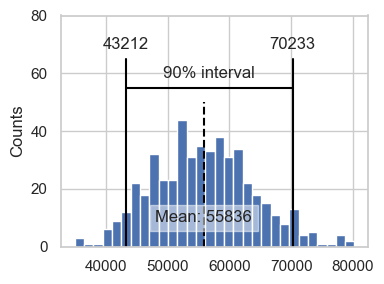

In [19]:
print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

El bootstrap es una herramienta general que se puede utilizar para generar intervalos de confianza para la mayoría de las estadísticas o parámetros de modelos. Los libros de texto de estadística y el software, con raíces en más de medio siglo de análisis estadístico sin computadoras, también hacen referencia a intervalos de confianza generados por fórmulas, especialmente la distribución t.

Por supuesto, lo que realmente nos interesa cuando tenemos un resultado muestral es: "¿Cuál es la probabilidad de que el valor verdadero esté dentro de un cierto intervalo?" Esta no es realmente la pregunta que responde un intervalo de confianza, pero termina siendo la forma en que la mayoría de las personas interpretan la respuesta.

El porcentaje asociado con el intervalo de confianza se denomina nivel de confianza. Cuanto mayor sea el nivel de confianza, más amplio será el intervalo. Esto sucede porque, al querer estar más seguro de que el intervalo contiene el valor verdadero, se necesita un rango más amplio para cubrir todas las posibles variaciones en los datos muestrales. Por ejemplo, un intervalo de confianza del 99% será más amplio que un intervalo de confianza del 95%, porque queremos estar más seguros (99% en lugar de 95%) de que el intervalo contiene el valor verdadero, y para lograr esa mayor seguridad, ampliamos el intervalo.

Además, cuanto más pequeña sea la muestra, más amplio será el intervalo (es decir, mayor será la incertidumbre). Esto sucede porque con menos datos, hay más incertidumbre acerca de la estimación del parámetro verdadero. Para compensar esa incertidumbre, se necesita un intervalo más amplio.  

Ambos aspectos tienen sentido: cuanto más seguro quieres estar, y cuanto menos datos tienes, más amplio debe ser el intervalo de confianza para estar suficientemente seguro de capturar el valor verdadero. Un tamaño de muestra pequeño significa que tienes menos información sobre la población, lo que introduce más variabilidad e incertidumbre en tus estimaciones. Para tener la misma seguridad (por ejemplo, un 95% de confianza), el intervalo debe ser más amplio para asegurarse de que incluye el valor verdadero, dado que hay más margen de error. Por el contrario, con un tamaño de muestra más grande, tienes más información, lo que reduce la incertidumbre y permite calcular un intervalo de confianza más estrecho.

**Ejemplo para Ilustrar el Concepto**  

Imagina que estás midiendo la altura promedio de estudiantes en una escuela. Si quieres estar 95% seguro de que el intervalo de confianza contiene la altura promedio verdadera, el intervalo podría ser algo así como de 160 cm a 170 cm. Si decides que necesitas estar 99% seguro, podrías necesitar ampliar el intervalo a algo como de 155 cm a 175 cm para capturar todas las posibles variaciones. Si tomas la altura de solo 5 estudiantes (una muestra pequeña), podrías obtener un intervalo de confianza de 150 cm a 180 cm debido a la mayor incertidumbre. Pero si tomas la altura de 50 estudiantes (una muestra más grande), podrías obtener un intervalo más preciso, digamos de 160 cm a 170 cm.

### Ideas Clave
- Los intervalos de confianza son la forma típica de presentar estimaciones como un rango de intervalos.
- Cuantos más datos tengas, menos variable será una estimación muestral.
- Cuanto menor sea el nivel de confianza que puedas tolerar, más estrecho será el intervalo de confianza.
- El bootstrap es una forma efectiva de construir intervalos de confianza.

> **Ejercicio 2.9**. Investigar las aplicaiones y casos de uso de Bootstraping en Machine Learning. Mostrar los resultados en un resumen.

El método de bootstrap es una técnica poderosa y versátil que encuentra múltiples aplicaciones en el ámbito del machine learning. Las principales aplicaciones y casos de uso de bootstrapping en este campo:

1. Evaluación de Modelos

El bootstrap permite estimar la variabilidad y la confiabilidad de las métricas de rendimiento de un modelo de aprendizaje automático. Por ejemplo, al entrenar un modelo de clasificación, puedes utilizar el bootstrap para generar múltiples conjuntos de datos de entrenamiento y prueba a partir de un único conjunto de datos original. Esto te permite:

Estimar la varianza en las métricas de rendimiento como precisión, recall, y F1-score.
Obtener intervalos de confianza para estas métricas, lo que proporciona una visión más profunda sobre la estabilidad y confiabilidad del modelo.

2. Comparación de Modelos

Cuando se comparan dos o más modelos, el bootstrap puede ser usado para evaluar si las diferencias en el rendimiento entre los modelos son estadísticamente significativas. Esto es útil para:

Determinar si un modelo es genuinamente superior a otro o si las diferencias observadas podrían deberse a la variabilidad de los datos.
Proporcionar pruebas estadísticas robustas que apoyen la selección de modelos.

3. Selección de Características

El bootstrap también se utiliza en la selección de características para evaluar la importancia y la estabilidad de las características seleccionadas. Al realizar bootstrapping en los datos y luego aplicar algoritmos de selección de características en cada muestra, puedes:

Identificar cuáles características son consistentemente seleccionadas, lo que indica su relevancia y robustez.
Reducir la probabilidad de sobreajustar a características que pueden ser ruidosas o irrelevantes.

4. Ensemble Learning

En técnicas de ensemble como Bagging (Bootstrap Aggregating), el bootstrap es fundamental para mejorar el rendimiento y la estabilidad de los modelos predictivos. En este contexto, el bootstrap se usa para:

Crear múltiples modelos a partir de subconjuntos aleatorios del conjunto de datos original.
Combinar las predicciones de estos modelos para mejorar la precisión y reducir la varianza.

5. Estimación de Incertidumbre

En aplicaciones como la regresión y la clasificación, el bootstrap ayuda a estimar la incertidumbre en las predicciones del modelo. Esto es crucial para:

Proporcionar bandas de confianza o intervalos de predicción alrededor de las estimaciones, lo que es esencial en campos como la medicina y la finanzas donde las decisiones basadas en predicciones requieren una comprensión clara de los riesgos asociados.

6. Validación de Datos Sintéticos

El bootstrap puede utilizarse para validar la calidad de los datos sintéticos generados por técnicas como el aumento de datos o la imputación. Al comparar estadísticas calculadas a partir de datos originales y sintéticos, el bootstrap ofrece:

Una manera de medir cuán bien los datos sintéticos representan la distribución de los datos reales.
Herramientas para ajustar y mejorar los métodos de generación de datos sintéticos.

> **Ejercicio 2.10** Replicar en un jupyter notebook los resultados del siguiente artículo: https://cienciadedatos.net/documentos/pystats04-bootstrapping-python
> Nota: Con replicar los codigos sería suficiente para entregar; replicar la teoria es opcional aunque por lo menos debes leerla si realmente quieres entender la importancia del Bootstrapping 

In [20]:
# Librerías 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
import pandas as pd
from tqdm import tqdm


In [21]:
# Generación de datos
np.random.seed(42)
datos = np.random.normal(loc=50, scale=10, size=30)

Funciones de Estadísticos y Bootstrapping

Definimos una función para calcular el estadístico de interés (media en este caso) y otra para realizar el bootstrapping

In [22]:
def calcular_estadistico(x):
    """Calcula la media de una muestra."""
    return np.mean(x)

def bootstraping(x, fun_estadistico, n_iteraciones=1000):
    """Genera muestras bootstrap y calcula el estadístico para cada muestra."""
    n = len(x)
    dist_boot = np.empty(n_iteraciones)
    for i in range(n_iteraciones):
        resample = np.random.choice(x, size=n, replace=True)
        dist_boot[i] = fun_estadistico(resample)
    return dist_boot


In [23]:
# Intervalo de Confianza basado en percentiles 
dist_boot = bootstraping(datos, calcular_estadistico, 1000)
ci = np.percentile(dist_boot, [2.5, 97.5])


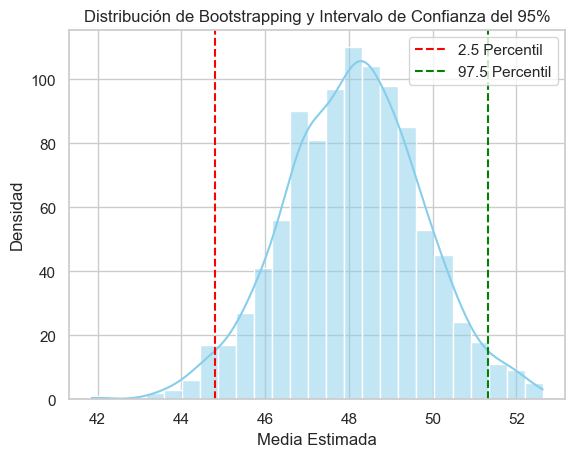

In [24]:
sns.histplot(dist_boot, kde=True, color="skyblue")
plt.axvline(x=ci[0], linestyle="--", label="2.5 Percentil", color='red')
plt.axvline(x=ci[1], linestyle="--", label="97.5 Percentil", color='green')
plt.title("Distribución de Bootstrapping y Intervalo de Confianza del 95%")
plt.xlabel("Media Estimada")
plt.ylabel("Densidad")
plt.legend()
plt.show()


In [25]:
print(f"Media observada de la muestra: {np.mean(datos)}")
print(f"Intervalo de confianza del 95% basado en percentiles: {ci}")


Media observada de la muestra: 48.118531041489625
Intervalo de confianza del 95% basado en percentiles: [44.79884592 51.31773864]
